# 기말고사 대비요령

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [wideform, longform, stack, reset_index, melt, set_index,groupby,map, applymap,lambda,pipe, FacetGrid]

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import * 
import matplotlib.pyplot as plt 

```python
# 기본!
pd.read_csv('')
json.loads(get.requests('').text)
```

`-` 아래의 내용을 숙지하시길 바랍니다. 
- wideform / longform 
- stack(), reset_index(), melt(), set_index() 
- groupby() 
- map(), applymap(), lambda 
- pipe() 

#### groupby()

In [155]:
# collapse
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')
grouped_df = df.groupby(by='AIRLINE')
list(grouped_df.groups)
grouped_df.get_group('AA')
for g in grouped_df.groups:
    print(g)
    display(grouped_df.get_group(g))

#### map

- 같은 결과~
```python
def inc(x):return x+1
list(map(inc,[1,2,3,4]))
list(map(lambda x:x+1,[1,2,3,4]))
```
output
```
[2, 3, 4, 5]
```

`-` map 과 list comprehensions 비교

In [22]:
f=lambda x: 'X' in x
f('X1'),f('y1')

(True, False)

In [29]:
list(map(f,['X1','y1'])),[f(x) for x in ['X1','y1']]

([True, False], [True, False])

`-` 두 개의 입력 받는 함수 pow의 map과 listi comprehensions 비교

In [27]:
list(map(pow,[2,4],[4,5])),[pow(x,y) for x,y in zip([2,4],[4,5])]

([16, 1024], [16, 1024])

- 두 개 이상을 입력받는 함수를 list comprehensions에 입력하고 싶을 때 zip()으로 묶어줘야 함

In [31]:
g=[]
for i in range(5):g.append(i**2)
g,list(map(lambda x : x**2,range(5)))

([0, 1, 4, 9, 16], [0, 1, 4, 9, 16])

- lsit comprehensions와 비교하면 반복 index를 쓰지 않는 장점이 있지만, 더 제약적으로 사용할 수밖에 없다.

#### lambda

`-` 기본

- 7로 같은 결과
```python
(lambda x,y: x+y)(3,4)
f=lambda x,y:x+y;f(3,4)
```

`-` lambda들의 list

In [8]:
l=[lambda x: x+1, lambda x:x+2]
for f in l:
    print(f(1))

2
3


`-` lambda들의 dictionary

In [10]:
dct={'f1':(lambda x:x+1),'f2':(lambda x:x+2)}
dct['f1'](1),dct['f2'](2)

(2, 4)

`-` lambda 조건부 입력

In [17]:
upper=lambda x,y: x if x>y else y
lower=lambda x,y: x if x<y else y
upper('a','t'),lower('a','t'),upper(3,4),lower(3,4)

('t', 'a', 4, 3)

`-` lambda expression return(lambda y:x+y 자체가 오브젝트라 가능)

In [18]:
def action(x):return (lambda y : x+y)
act=action(88)
act2=action(89)
print(act(2)),print(act2(2))

90
91


(None, None)

##### lambda + map

- map의 기능
    - (1) 리스트를 원소별로 분해하여
    - (2) 어떠한 함수를 적용하여 아웃풋을 구한뒤
    - (3) 각각의 아웃풋을 다시 하나의 리스트로 묶음 

In [121]:
# collapse
np.random.seed(1)
df2= pd.DataFrame(np.random.normal(size=(10,4)),columns=list('ABCD'))

```python
df2.loc[map(lambda x: x>0,df2['A']),:]
df2.loc[lambda df: df['A']>0,:]
```
같은 결과, True, False로 이루어진 벡터를 리턴할 수 있는 함수오브젝트 자체를 전달해도 인덱싱이 가능 
```python
df2.iloc[map(lambda x: x>0,df2['A']),:]
# df2.iloc[lambda df: df['A']>0,:] 오류!
```

```python
df2.loc[map(lambda x,y: x>0 and y<0, df2['A'],df2['C']),:] 
df2.iloc[map(lambda x,y: x>0 and y<0, df2['A'],df2['C']),:] 
df2.loc[map(lambda x,y: (x>0) & (y<0), df2['A'],df2['C']),:] 
df2.iloc[map(lambda x,y: (x>0) & (y<0), df2['A'],df2['C']),:] 
df2.loc[lambda df: (df['A'] >0) & (df['C']<0)] 
# df2.iloc[lambda df: (df['A'] >0) & (df['C']<0)] 오류뜨는 iloc
# 괄호 치면 무조건 and가 아니라 &로 묶어줌
```

#### query

In [130]:
#collapse
np.random.seed(1)
df=pd.DataFrame(np.random.normal(size=(15,4)),columns=list('ABCD'))

```python
meanA=df.A.mean()
df.query(' A> @meanA'
         ' and A<0.8')
```

```python
df.query('index==0 or 3<=index <=5  or 9<=index <=11')
df.query('index==0 or index ==[8,9,10]')
```
```python
i1= np.arange(3)
df.query('index in @i1  or index==5')
```
특정 index 선택하는 법

```python
# 실제 시계열에서 유용!
df2=pd.DataFrame(np.random.normal(size=(10,4)), columns=list('ABCD'),index=pd.date_range('20201226',periods=10))
df2.query(
    ' "2020-12-27"<= index <= "2021-01-03" '
   ' and A+B < C')
````

#### 열,행 선택

In [39]:
#collapse
dic={'X1':np.random.normal(0,1,5),
     'X2':np.random.normal(0,1,5),
     'X3':np.random.normal(0,1,5),
     'X4':np.random.normal(0,1,5)}
df=pd.DataFrame(dic)

`````python
df.X2
df['X2'] # pandas series return
df[['X2']] # dictionary return 마치 테이블처럼
df.loc[:,'X2'] # 모든 행 선택, pandas series return
df.loc[:,['X2']] # dictionary  return
df.loc[:,[False True,False]] # 불인덱싱가능(=Boolean indexing)
# 컴퓨터 과학에서 불리언(boolean) 자료형은 논리 자료형이라고도 하며, 참과 거짓을 나타내는 데 쓰인다
df.iloc[:,1] # iloc = integer loction
df.iloc[:,[1]] # iloc에서는 0이 첫번째
df.iloc[:,[False True,False]]

df[['X2','X3','X4']]
df.loc[:,['X2','X3','X4']]
df.loc[:,'X2':'X4']
df.loc[:,[False,True, True True]]
df.iloc[:,[1,2,3]]
df.iloc[:,1:]
df.iloc[:,1:3]
df.iloc[:,range(1,3)]
df.iloc[:,[False,True, True True]]
`````
`df.X2`가 단순하지만 변수 이름을 알고 있어야 하며, 변수 이름에 `마침점(.)`이나 `공백( )`이 있으면 사용할 수 없다.
`````python
df.iloc[:,::2]
`````
2배수로 열 가져오기, 행에도 적용 가능

In [38]:
#collapse
_df = pd.DataFrame(np.array([[1,2,3],[3,4,5],[5,6,7]]))

`````python
_df[1]
_df[[1]]
_df.loc[:,0]
_df.iloc[:,0]
_df.loc[:,[0]]
_df.iloc[:,[0]]
`````
- 열이름이 integer일 경우이다. 모두 같은 결과로 ` 선택.

In [42]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv')
# pd.Series(df.columns)
# 열 이름들 쭉 나열!

```python
df.iloc[:,list(map(lambda x: 'actor' in x,df.columns))]
df.loc[:,list(map(lambda x: 'actor' in x, df.columns))]
df.iloc[:,map(lambda x: 'actor' in x,df.columns)]
df.loc[:,map(lambda x: 'actor' in x, df.columns)]
df.loc[:,filter(lambda x: 'actor' in x, df.columns)]
# filter는 문자열로 반환해주기 때문에 iloc은 에러가 뜬다.
```
actor 라는 단어가 포함된 열만 선택
```python
df.iloc[:,list(map(lambda x: 'actor' not in x,df.columns))]
df.loc[:,list(map(lambda x: 'actor' not in x, df.columns))]
df.iloc[:,map(lambda x: 'actor' not in x,df.columns)]
df.loc[:,map(lambda x: 'actor' not in x, df.columns)]
df.loc[:,filter(lambda x: 'actor' not in x, df.columns)]
```
actor 라는 단어가 포함되지 않는 열만 선택
```python
df.iloc[:,map(lambda x: 's' ==x[-1],df.columns)]
df.loc[:,map(lambda x: 's' ==x[-1],df.columns)]
```
변수 이름이 s로 끝나는 변수들 선택 (반대는 !=)
```python
df.iloc[:,map(lambda x: 'a' != x[0],df.columns)]
df.loc[:,map(lambda x: 'a' != x[0],df.columns)]
```
변수 이름이 a로 시작하지 않는 변수들만 선택(반대는 =)
```python
df.iloc[:,map(lambda x: 'c'==x[0] or 'd'==x[0],df.columns)]
df.loc[:,map(lambda x: 'c'==x[0] or 'd'==x[0],df.columns)]
```

#### 미나드의 접근방법

In [53]:
# collapse
x=[44,48,49,58,62,68,69,70,76,79] ## 몸무게 
y=[159,160,162,165,167,162,165,175,165,172] ## 키
g= 'f','f','f','f','m','f','m','m','m','m'
df=pd.DataFrame({'w':x,'h':y,'g':g})

<AxesSubplot:xlabel='w', ylabel='h'>

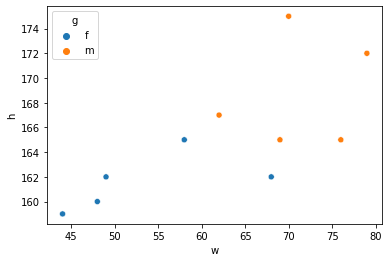

In [96]:
sns.scatterplot(data=df,x='w',y='h',hue='g')

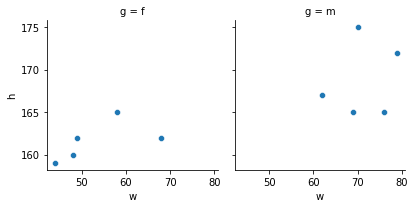

In [57]:
figs = sns.FacetGrid(df,col='g') # 다중 그래프 그릴때 많이 사용됨
figs.map (sns.scatterplot,'w','h') 

In [64]:
df1=df.query("g =='f'")[['w','h']] ## 여성.csv 
df2=df.query("g =='m'")[['w','h']] ## 남성.csv 
# pd.concat([df1,df2],keys=['f','m']).reset_index().iloc[:,[0,2,3]].rename(columns={'level_0':'g'})
# 열 이어 붙이기!

`-` ggplot을 이용한 고난도 문제가 출제될 수 있습니다. 

In [66]:
# collapse
mpg=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/mpg.csv')

/home/cgb4/anaconda3/envs/csy/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/home/cgb4/anaconda3/envs/csy/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


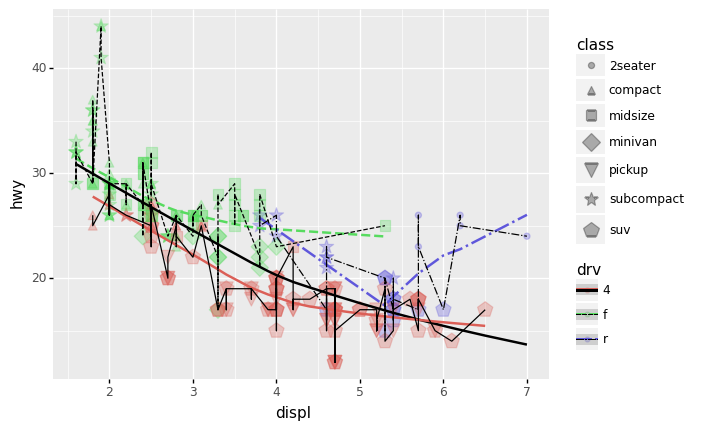

<ggplot: (8772710787575)>

In [94]:
ggplot(mpg,aes(x='displ',y='hwy'))+\
geom_point(aes(size='class',shape='class',color='drv'),alpha=0.3)+\
geom_smooth()+geom_smooth(aes(linetype='drv',color='drv'))+\
geom_line(aes(linetype='drv'))

`-` 아이스크림, 기온, 질병의 상관관계(7주차)

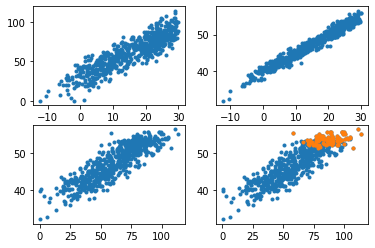

In [113]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/extremum.csv')
# pd.Series(df.columns)
# 열 이름 및 번호 보기
temp=np.array(df.iloc[:,3])
# len(temp) 
# 656
ϵ1=np.random.normal(size=656, scale=10) 
icecream=temp*2 + 30 + ϵ1 
ϵ2=np.random.normal(size=656,scale=1)
disease=temp*0.5 + 40 +ϵ2
df1=pd.DataFrame({'temp':temp, 'icecream':icecream, 'disease':disease})
fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2) 
ax1.plot(temp,icecream,'.')
ax2.plot(temp,disease,'.')
ax3.plot(icecream,disease,'.')
ax4.plot(icecream,disease,'.')
ax4.plot(icecream[temp>25],disease[temp>25],'.')

In [114]:
# collapse
def f(x): 
    if x<0: 
        y='group0'
    elif x<5: 
        y='group5'
    elif x<10: 
        y='group10'
    elif x<15: 
        y='group15'
    elif x<20:
        y='group20'
    elif x<25: 
        y='group25'
    else: 
        y='group30'
    return y 

In [115]:
df1['temp2']=list(map(f,df1.temp))

In [117]:
#ggplot(data=df1)+geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.5)+\
#geom_smooth(aes(x='icecream',y='disease',colour='temp2'),size=2,linetype='dashed')

In [118]:
df1.corr()

,temp,icecream,disease
temp,1.000000,0.886000,0.978779
icecream,0.886000,1.000000,0.869781
disease,0.978779,0.869781,1.000000


#### fifa22

In [144]:
fifa22=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
fifa22=fifa22.sort_values(by='Overall',ascending=False).reset_index().rename(columns={'index':'index_old'})
fifa22['Potential2'] = fifa22['Potential'] - fifa22['Overall']
# Potential > Overall 인 관계가 성립하는것 같다. →\to→ Potetial2= Potential - Overall 인 변수를 새로 만들고 시각화
# fifa22.Overall.describe()
# 통계값이 나옴

In [145]:
#ggplot(data=fifa22)+geom_point(aes(x='Overall', y='Potential2'),alpha=0.1,position='jitter')

In [149]:
def f(x): 
    if x>72: y='Q1' 
    elif x>68: y='Q2'
    elif x>63: y='Q3'
    else: y='Q4'
    return y 

In [150]:
fifa22['Q']=list(map(f,fifa22.Overall))

```python
fifa22.query('Q=="Q1"').Overall.mean()
np.mean(fifa22.query('Q=="Q1"').Overall)
```
평균 구하는 같은 결과

In [151]:
# fifa22.groupby(by='Q').mean().Overall
l=fifa22.groupby(by='Q').mean().Overall.to_list()

In [152]:
def g(x): 
    if x=='Q1': y=l[0]
    elif x=='Q2': y=l[1]
    elif x=='Q3': y=l[2]
    else: y=l[3]
    return y

In [153]:
fifa22['Qx']=list(map(g,fifa22.Q))

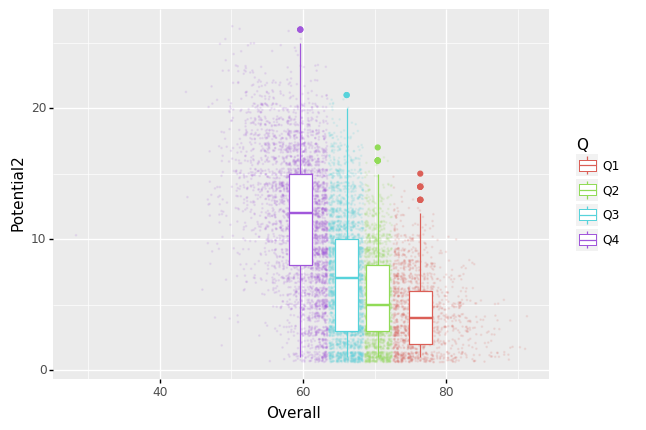

<ggplot: (8772704972692)>

In [154]:
ggplot(data=fifa22.query('Potential2>0.1'))\
+geom_point(aes(x='Overall', y='Potential2',color='Q'),alpha=0.1,size=0.1,position='jitter')\
+geom_boxplot(aes(x='Qx', y='Potential2',color='Q'))

`-` pandas backend를 이용한 plot은 아주 잘 숙지하고 계셔야합니다. 